In [1]:
import krakenex
from pykrakenapi import KrakenAPI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sea
# import tensorflow as tf
# import keras
api = krakenex.API()
k = KrakenAPI(api)

In [2]:
data = k.get_asset_info()
data

,aclass,altname,decimals,display_decimals
1INCH,currency,1INCH,10,5
AAVE,currency,AAVE,10,5
ACA,currency,ACA,10,5
ADA,currency,ADA,8,6
ADA.S,currency,ADA.S,8,6
...,...,...,...,...
ZEUR,currency,EUR,4,2
ZGBP,currency,GBP,4,2
ZJPY,currency,JPY,2,0
ZRX,currency,ZRX,10,5


In [3]:
from time import sleep
intervalls = [5, 30, 1440, 21600] #all possible intervalls
data_frames = []
for time in intervalls:
    df = k.get_ohlc_data(pair='ETHEUR', interval=time, ascending=True, since=0)[0]
    df.name = str(time)
    data_frames.append(df)
    sleep(1)

In [4]:
ETH_5 = data_frames[1]
ETH_5

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2022-03-15 18:00:00,1647367200,2377.42,2383.00,2371.70,2376.44,2376.51,401.490939,217
2022-03-15 18:30:00,1647369000,2376.06,2408.58,2375.39,2403.00,2393.40,545.622469,467
2022-03-15 19:00:00,1647370800,2402.52,2428.31,2402.52,2420.51,2418.79,828.987318,642
2022-03-15 19:30:00,1647372600,2420.52,2429.01,2418.86,2425.50,2422.43,172.580125,250
2022-03-15 20:00:00,1647374400,2426.29,2435.93,2406.82,2407.70,2415.49,232.349471,357
...,...,...,...,...,...,...,...,...
2022-03-30 15:30:00,1648654200,3005.23,3030.00,3002.00,3029.10,3019.20,168.832846,331
2022-03-30 16:00:00,1648656000,3029.22,3043.00,3026.51,3039.46,3034.39,89.475313,250
2022-03-30 16:30:00,1648657800,3039.86,3052.27,3032.89,3043.41,3046.18,168.691403,338


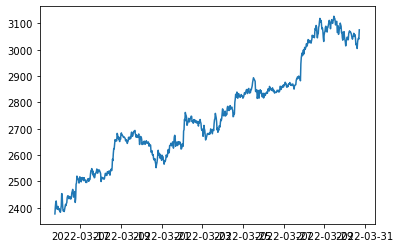

In [6]:
fig, ax = plt.subplots()
lines = ax.plot(ETH_5.index,ETH_5['close'])